# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane had the lowest standard deviation and their mean and medians were very close suggesting that the data was not skewed and there were minimal influence of outliers. This could be the reason they were the most observed drug regimen as noticable in the bar chart. Gender is not really at play as the number of males vs females is in balance , 51% for males and 49% for females. I believe this test was conducted work for all rather than a particular gender. 
The Line chart indicates that the tumor in mouse L509 tends to reduce and then grow again. Which might question the effectiveness of the drug. The Scatter plot with linear regression suggests there is a positive correlation between the weight and the size of the tumor. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID" )

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
no_dups = combined_df["Mouse ID"].drop_duplicates()
no_dups.count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_time =  combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
id_time["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_data = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
all_dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989",:]
clean_data = cleaned_df.drop_duplicates(subset="Mouse ID", keep="last")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.0,0,Ketapril,Male,15,29
20,x336,0,45.0,0,Naftisol,Female,4,29
53,h428,0,45.0,0,Ketapril,Female,1,27
55,v199,0,45.0,0,Naftisol,Female,17,29
109,o848,0,45.0,0,Stelasyn,Female,14,27


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = combined_df.groupby(combined_df["Drug Regimen"])["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.  
mean = grouped_regimen.mean()
median = grouped_regimen.median()
variance = grouped_regimen.var()
standev = grouped_regimen.std()
sem = grouped_regimen.sem()
# Assemble the resulting series into a single summary DataFrame.
assembled_df = pd.DataFrame({"Mean Tumor Volume": mean,
                             "Median Tumor Volume": median,
                             "Variance Tumor Volume": variance,
                             "Standard Dev. Tumor Volume": standev,
                             "SEM Tumor Volume": sem
                            })
assembled_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

stats_agg = combined_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std',"sem"]})
stats_agg




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

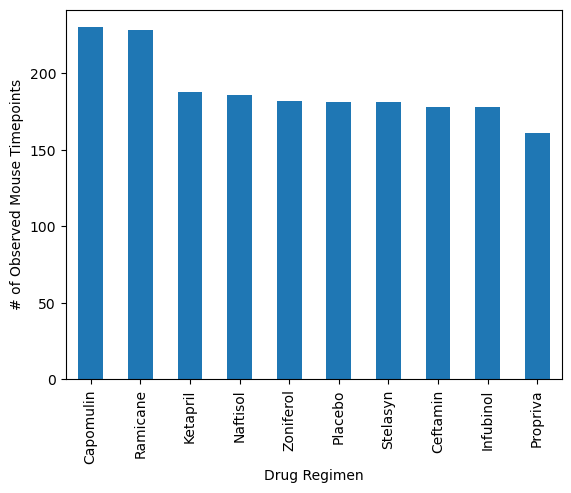

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_info_df = combined_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
bar_info_df.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")

<BarContainer object of 10 artists>

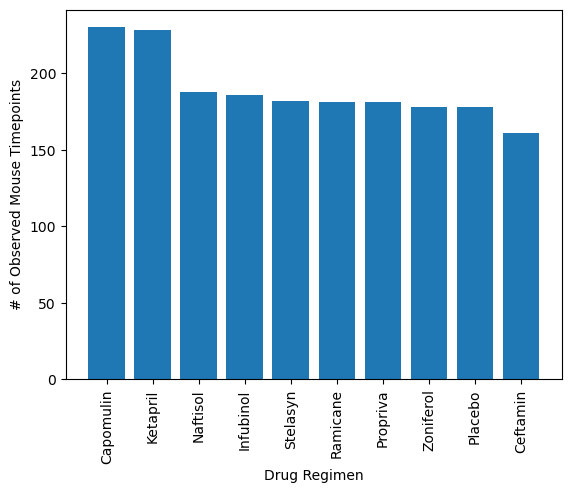

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = combined_df["Drug Regimen"].unique()
y_axis = combined_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.bar(x_axis,y_axis)

<Axes: ylabel='Sex'>

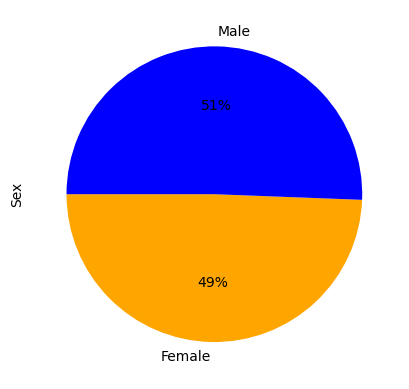

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = combined_df.groupby(["Sex"])["Sex"].count()
colors = ['orange', 'blue']
gender_df.plot(kind="pie", autopct="%1.0f%%", startangle=180, colors=colors)

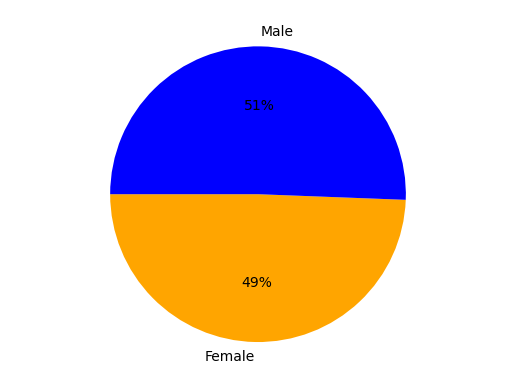

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_df = combined_df.loc[combined_df["Sex"]=="Male","Sex"].count()
female_df = combined_df.loc[combined_df["Sex"]=="Female","Sex"].count()
labels = combined_df["Sex"].unique()
value = [female_df, male_df]
colors = ['orange','blue']
plt.axis("Equal")
plt.pie(value,labels=labels,autopct="%1.0f%%",colors=colors, startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
filtered_df = clean_data.groupby("Mouse ID")["Timepoint"].max()
merged_df = pd.merge(filtered_df,clean_data, on=["Mouse ID", "Timepoint"])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drugtype_df = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])]
drugtype_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []


for treatment in treatments:
    treatment_data = drugtype_df[drugtype_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol.append(treatment_data)

    quartiles = treatment_data.quantile([0.25, 0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_occupancy = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)] 

    if len(outlier_occupancy) > 0:
        print(f"{treatment}'s Potential Outliers {outlier_occupancy}")
    else:
        print(f"{treatment}'s Potential Outliers {outlier_occupancy}")          

Capomulin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


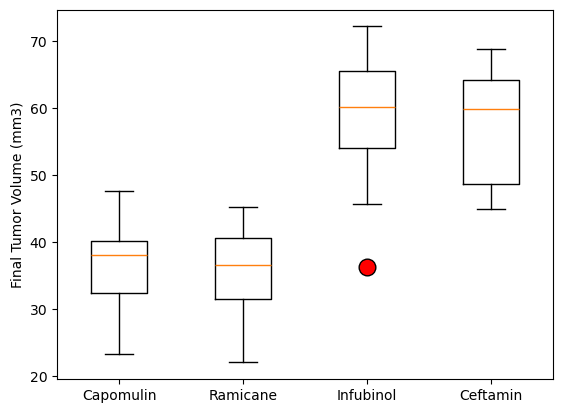

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.ylabel("Final Tumor Volume (mm3)")
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
plt.boxplot(tumor_vol,labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

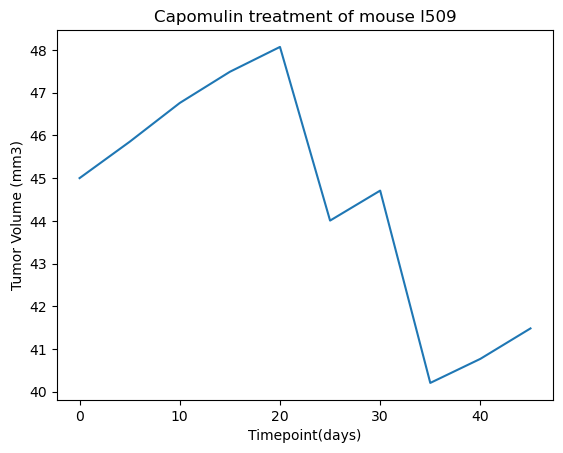

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_timepoint = combined_df.loc[combined_df["Mouse ID"] == "l509", "Timepoint"]
cap_timepoint
cap_tumvol = combined_df.loc[combined_df["Mouse ID"] == "l509", "Tumor Volume (mm3)"]
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.plot(cap_timepoint,cap_tumvol)
plt.show()

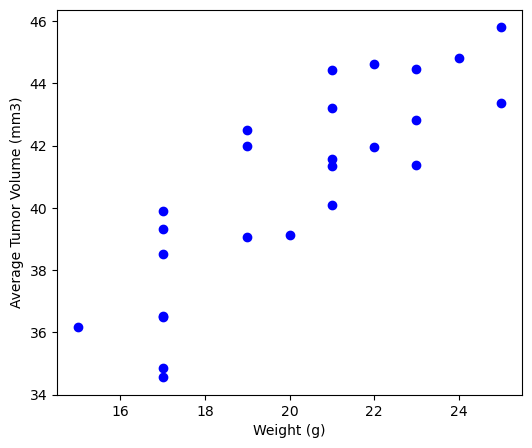

In [ ]:

capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(average_tumor_volume, clean_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()
plt.figure(figsize=(6, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


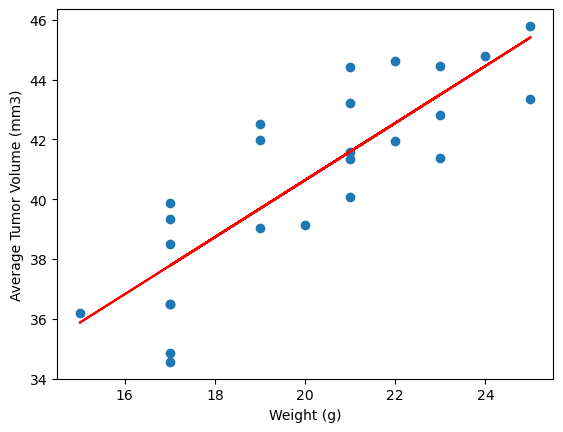

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = merged_data["Weight (g)"]
y_values = merged_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()